# 01 Data Preparation

Transform NHS flu test positivity CSV into datetime-indexed pandas Series.

**Input:** `data/NHSdata_dailypercentace_flupositive.csv`  
**Output:** `data/flu_daily_clean.pkl`

**Quality checks:**
- Parse dates with correct format (`'%d %B %Y'`)
- Verify daily frequency with no gaps
- Confirm data range and distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Define paths
project_root = Path.cwd().parent
data_dir = project_root / 'data'
raw_file = data_dir / 'NHSdata_dailypercentace_flupositive.csv'
output_file = data_dir / 'flu_daily_clean.pkl'

## Load and Parse Data

In [4]:
# Read CSV, skipping header rows
df = pd.read_csv(raw_file, skiprows=3)
print(f"Raw data shape: {df.shape}")
df.head()

Raw data shape: (1078, 3)


,Date,Season,Positivity (%)
0,4 July 2022,2022 to 2023,0.3
1,5 July 2022,2022 to 2023,0.4
2,6 July 2022,2022 to 2023,0.5
3,7 July 2022,2022 to 2023,0.5
4,8 July 2022,2022 to 2023,0.5


In [5]:
# Parse dates with correct format and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y')
df = df.set_index('Date')
print(f"\nDate range: {df.index.min()} to {df.index.max()}")
print(f"Total observations: {len(df)}")


Date range: 2022-07-04 00:00:00 to 2025-06-15 00:00:00
Total observations: 1078


In [6]:
# Extract positivity column as Series
ts = df['Positivity (%)'].copy()
ts.name = 'positivity'
print(f"\nSeries shape: {ts.shape}")
print(f"Data type: {ts.dtype}")


Series shape: (1078,)
Data type: float64


## Quality Checks

In [7]:
# Check for missing values
missing = ts.isna().sum()
print(f"Missing values: {missing}")
if missing > 0:
    print("WARNING: Missing values detected!")

Missing values: 0


In [8]:
# Check for duplicate dates
duplicates = ts.index.duplicated().sum()
print(f"Duplicate dates: {duplicates}")
if duplicates > 0:
    print("WARNING: Duplicate dates detected!")

Duplicate dates: 0


In [9]:
# Verify daily frequency (no gaps)
expected_days = (ts.index.max() - ts.index.min()).days + 1
actual_days = len(ts)
print(f"Expected daily observations: {expected_days}")
print(f"Actual observations: {actual_days}")
print(f"Continuous daily series: {expected_days == actual_days}")

if expected_days != actual_days:
    print(f"WARNING: Gap detected! Missing {expected_days - actual_days} days")

Expected daily observations: 1078
Actual observations: 1078
Continuous daily series: True


In [10]:
# Set explicit daily frequency
ts = ts.asfreq('D')
print(f"Frequency: {ts.index.freq}")

Frequency: <Day>


In [11]:
# Summary statistics
print("\nSummary Statistics:")
print(ts.describe())


Summary Statistics:
count    1078.000000
mean        5.302412
std         6.888317
min         0.200000
25%         0.900000
50%         2.200000
75%         7.775000
max        33.000000
Name: positivity, dtype: float64


## Visualization

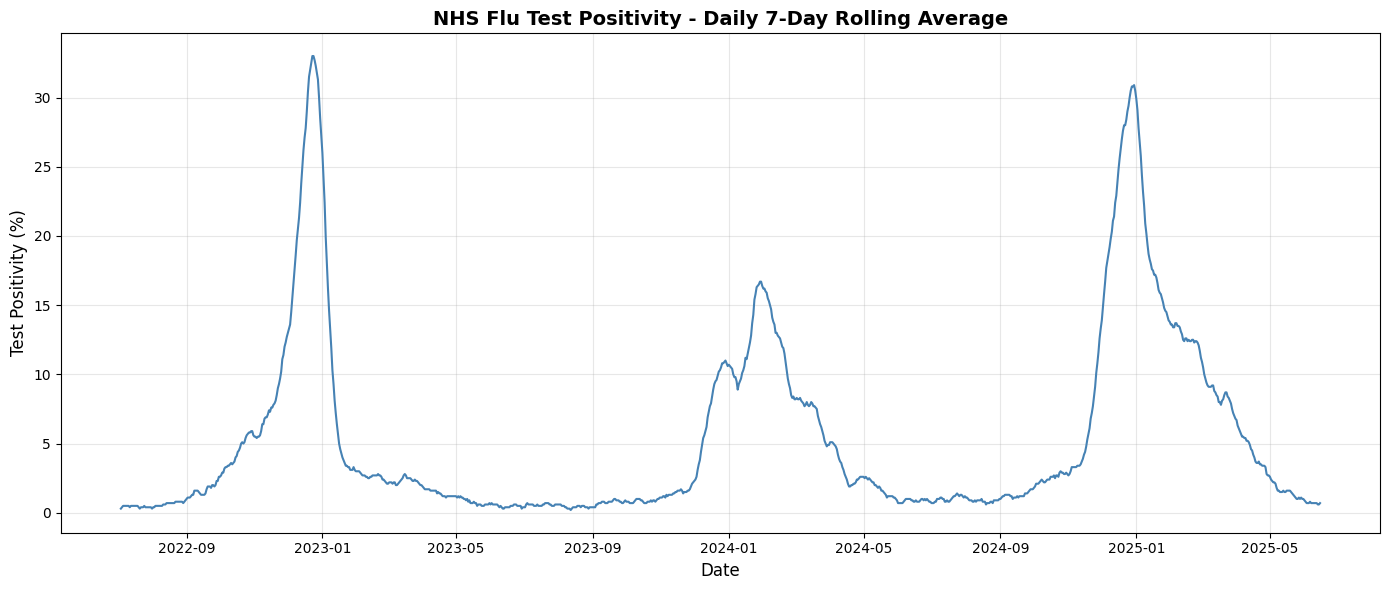


Data range: 0.2% to 33.0%


In [12]:
# Plot time series
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(ts.index, ts.values, linewidth=1.5, color='steelblue')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Test Positivity (%)', fontsize=12)
ax.set_title('NHS Flu Test Positivity - Daily 7-Day Rolling Average', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nData range: {ts.min():.1f}% to {ts.max():.1f}%")

## Save Cleaned Data

In [13]:
# Save as pickle to preserve datetime index frequency
ts.to_pickle(output_file)
print(f"Saved clean data to {output_file}")
print(f"File size: {output_file.stat().st_size / 1024:.1f} KB")

Saved clean data to /home/mikhailarutyunov/projects/time-series-flu/data/flu_daily_clean.pkl
File size: 26.2 KB


In [14]:
# Verify saved file can be loaded
ts_loaded = pd.read_pickle(output_file)
print(f"\nVerification:")
print(f"Loaded shape: {ts_loaded.shape}")
print(f"Loaded frequency: {ts_loaded.index.freq}")
print(f"Data matches original: {ts.equals(ts_loaded)}")


Verification:
Loaded shape: (1078,)
Loaded frequency: <Day>
Data matches original: True


## Checkpoint Summary

**Expected outcomes:**
- 1078 daily observations (July 2022 - June 2025)
- No missing values
- Continuous daily frequency with no gaps
- Data range: 0.2% - 33.0%
- Plot shows seasonal flu patterns with winter peaks

**Next:** Proceed to `02_roll_loop.ipynb` for rolling forecast generation.